# Domain proyek

## Latar Belakang

Jumlah penderita obesitas di seluruh dunia lebih dari satu miliar orang. Berdasarkan penelitian yang dipublikasikan dalam jurnal The Lancet, data dari tahun 2022 hingga tahun terakhir yang dimasukkan dalam analisis menunjukkan bahwa ada 879 juta orang dewasa dan 159 juta anak-anak yang mengalami obesitas atau kelebihan berat badan.

Secara global, angka obesitas di kalangan anak-anak dan remaja meningkat empat kali lipat dari tahun 1990 hingga 2022, sementara angka obesitas di kalangan orang dewasa meningkat lebih dari dua kali lipat. Penelitian ini juga mengungkapkan bahwa tingkat anak-anak dan remaja yang mengalami kekurangan berat badan menurun pada periode yang sama, dan penurunannya lebih dari separuh di antara orang dewasa di seluruh dunia. Oleh karena itu, obesitas saat ini menjadi bentuk malnutrisi yang paling umum di banyak negara.

Dari masalah tersebut, menggunakan dataset Obesity Levels & Life Style dari kagle, kita dapat melihat aspek mana saja yang memberikan pengaruh besar pada tingkat obesitas sehingga dapat dihindari dan anda dapat melihat apakah anda mengalami obesitas atau tidak berdasarkan hasil analisis dari dataset tersebut.

Sumber:\
https://www.kompas.com/global/read/2024/03/01/115505570/jumlah-penderita-obesitas-di-seluruh-dunia-lebih-dari-1-miliar
https://www.kompas.com/sains/read/2022/03/08/090300523/waspada-obesitas-banyak-dialami-orang-usia-muda-ini-penjelasannya
https://dunia.tempo.co/read/1839971/who-lebih-dari-satu-miliar-orang-di-dunia-obesitas

## Memahami Dataset

Gender \
Age\
Height\
Weight\
Family_history_with_overweight\
FAVC (Frequent consumption of high-caloric food)\
FCVC (Frequency of consumption of vegetables)\
NCP (Number of main meals)\
CAEC (Consumption of food between meals)\
SMOKE\
CH2O (Daily water consumption)\
SCC (Caloric beverages consumption)\
FAF (Physical activity frequency)\
TUE (Time spent using technological devices)\
CALC (Consumption of alcohol)\
MTRANS (Mode of transportation)\
NObeyesdad (Target variable representing obesity level)

download dataset : 
https://www.kaggle.com/datasets/fatemehmehrparvar/obesity-levels
penjelasan dataset
https://www.kaggle.com/code/mpwolke/obesity-levels-life-style#Dataset-for-estimation-of-obesity-levels-based-on-eating-habits-and-physical-condition-in-individuals-from-Colombia,-Peru-and-Mexico

Dataset ini adalah dataset yang diambil dari Kagle berdasarkan paper dari Fabio MendozaPalecho dan Alexis de la HozManotas yang bertujuan untuk meneliti pengaruh gaya hidup dan beberapa faktor lain terhadap obesitas di negara Meksiko, Peru dan Colombia dengan jumlah sample 2111 dan 17 atribut

# Data Loading

In [1]:
# Import library yang dibutuhkan
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
# load dataset
dataset = "D:/Alan/Data SCience/Project 1/ObesityDataSet.csv"
df = pd.read_csv(dataset)
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

Melihat secara sepintas informasi dari dataset seperti dimensi dataset dan Dtype

# Exploratory Data Analysis - Deskripsi Variabel

## Deskripsi Variabel

In [4]:
# Bulatkan nilai pada kolom "Age" ke bawah
df['Age'] = df['Age'].astype(int)

# Verifikasi perubahan
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


Pada kolom "Age", Dtype-nya adalah Float, sedangkan umur seharusnya adalah int. Maka, jenis datanya akan dirubah dan kolom tersebut akan dibulatkan ke bawah.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   int32  
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [6]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,23.972525,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.308664,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.000000,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.000000,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [7]:
df.isna().sum()
#outlier

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

Tidak terdapat _missing Value_ pada dataset ini dan setelah melihat `df.describe()`, data sudah cukup baik dan dapat segera diproses.

# Data Preparation 1

Data preparation dibagi menjadi 2 (DP 1 dan DP 2). Hal ini bertujuan untuk memudahkan analisis dengan mengeliminasi kolom (atribut) yang tidak memiliki hubungan atau hubungannya kecil sekali terhadap perubahan nilai obesitas (NObeyesdad) dan merubah `Dtype` Object menjadi Float dengan `Encoding`. Setelah atribut yang digunakn telah disederhanakan, kita dapat melanjutkan ke tahap berikutnya.

In [8]:
# Buat salinan dataset awal
dfe = df.copy()

# Menggunakan LabelEncoder untuk mengkodekan variabel objek
label_encoder = preprocessing.LabelEncoder()

# Daftar kolom yang ingin diencode
columns_to_encode = ['Gender','family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 'NObeyesdad']

# Loop melalui setiap kolom dan mengkodekannya
for col in columns_to_encode:
    dfe[col] = label_encoder.fit_transform(dfe[col])

# Menampilkan hasil
print(dfe[columns_to_encode].head())
dfe.head()

   Gender  family_history_with_overweight  FAVC  CAEC  SMOKE  SCC  CALC  \
0       0                               1     0     2      0    0     3   
1       0                               1     0     2      1    1     2   
2       1                               1     0     2      0    0     1   
3       1                               0     0     2      0    0     1   
4       1                               0     0     2      0    0     2   

   MTRANS  NObeyesdad  
0       3           1  
1       3           1  
2       3           1  
3       4           5  
4       3           6  


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,21,1.62,64.0,1,0,2.0,3.0,2,0,2.0,0,0.0,1.0,3,3,1
1,0,21,1.52,56.0,1,0,3.0,3.0,2,1,3.0,1,3.0,0.0,2,3,1
2,1,23,1.80,77.0,1,0,2.0,3.0,2,0,2.0,0,2.0,1.0,1,3,1
3,1,27,1.80,87.0,0,0,3.0,3.0,2,0,2.0,0,2.0,0.0,1,4,5
4,1,22,1.78,89.8,0,0,2.0,1.0,2,0,2.0,0,0.0,0.0,2,3,6


In [9]:
dfe.corr()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
Gender,1.000000,0.050677,0.618466,0.161668,0.102512,0.064934,-0.274505,0.067600,0.091543,0.044698,0.107930,-0.102633,0.189607,0.017269,0.007616,-0.137537,0.024908
Age,0.050677,1.000000,-0.030738,0.190263,0.195552,0.055872,0.012024,-0.047391,0.074851,0.097897,-0.045675,-0.111882,-0.144725,-0.299439,-0.043344,-0.601020,0.229053
Height,0.618466,-0.030738,1.000000,0.463136,0.247684,0.178364,-0.038121,0.243672,0.048818,0.055499,0.213376,-0.133753,0.294709,0.051912,-0.129732,-0.073609,0.038986
Weight,0.161668,0.190263,0.463136,1.000000,0.496820,0.272300,0.216125,0.107469,0.287493,0.025746,0.200575,-0.201906,-0.051436,-0.071561,-0.206677,0.004610,0.387643
family_history_with_overweight,0.102512,0.195552,0.247684,0.496820,1.000000,0.208036,0.040372,0.071370,0.169787,0.017385,0.147437,-0.185422,-0.056673,0.022943,0.036676,-0.101540,0.313667
FAVC,0.064934,0.055872,0.178364,0.272300,0.208036,1.000000,-0.027283,-0.007000,0.150068,-0.050660,0.009719,-0.190658,-0.107995,0.068417,-0.089520,-0.069800,0.044582
FCVC,-0.274505,0.012024,-0.038121,0.216125,0.040372,-0.027283,1.000000,0.042216,-0.054670,0.014320,0.068461,0.071852,0.019939,-0.101135,-0.060781,0.064743,0.018522
NCP,0.067600,-0.047391,0.243672,0.107469,0.071370,-0.007000,0.042216,1.000000,-0.097801,0.007811,0.057088,-0.015624,0.129504,0.036326,-0.071747,-0.053858,-0.092616
CAEC,0.091543,0.074851,0.048818,0.287493,0.169787,0.150068,-0.054670,-0.097801,1.000000,-0.055282,0.144995,-0.109179,-0.030110,-0.048567,-0.047540,-0.048535,0.327295
SMOKE,0.044698,0.097897,0.055499,0.025746,0.017385,-0.050660,0.014320,0.007811,-0.055282,1.000000,-0.031995,0.047731,0.011216,0.017613,-0.082471,-0.010702,-0.023256


Pada bagian ini, dilihat korelasi antar atribut dengan variabel NObeyesdad. Akan diambil korelasi yang cukup signifikan (corr>0.2 atau corr<-0.2) dan mengeliminasi atribut yang tidak memenuhi kriteria tersebut.

In [10]:
# Menghapus kolom-kolom yang disebutkan
columns_to_drop = ['Gender', 'FAVC', 'FCVC', 'NCP', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS']
dfe.drop(columns=columns_to_drop, inplace=True)

# Menampilkan DataFrame setelah menghapus kolom-kolom
print(dfe.head())

   Age  Height  Weight  family_history_with_overweight  CAEC  NObeyesdad
0   21    1.62    64.0                               1     2           1
1   21    1.52    56.0                               1     2           1
2   23    1.80    77.0                               1     2           1
3   27    1.80    87.0                               0     2           5
4   22    1.78    89.8                               0     2           6


Jika dilihat, Variabel "Height" memiliki korelasi <0.2 dan >-0.2 namun tidak dieliminasi. Hal ini dikarenakan dalam melihat tingkat obesitas sesorang, rasio tinggi badan dan berat badan sangat penting untuk dilihat meskipun tidak ada korelasi antar keduanya. Sederhananya, semakin tinggi seseorang tidak berarti dia semakin gemuk (obesitas), tetapi "secara sederhana" perbandingan antar berat badan dan tinggilah yang akan menentukannya.

In [11]:
dfe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 6 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             2111 non-null   int32  
 1   Height                          2111 non-null   float64
 2   Weight                          2111 non-null   float64
 3   family_history_with_overweight  2111 non-null   int32  
 4   CAEC                            2111 non-null   int32  
 5   NObeyesdad                      2111 non-null   int32  
dtypes: float64(2), int32(4)
memory usage: 66.1 KB


Sekarang, dataset `dfe` hanya tersisa dataset yang kita perlukan saja untuk dianalisis lebih lanjut

# Exploratory Data Analysis-Univariate Analysis

Bagi fitur pada dataset menjadi dua bagian, yaitu numerical features dan categorical features.

In [12]:
categorical_features = ['family_history_with_overweight', 'CAEC']
numerical_features = ['Age','Weight','Height']

## Categorical Features

                                jumlah sampel  persentase
family_history_with_overweight                           
yes                                      1726        81.8
no                                        385        18.2


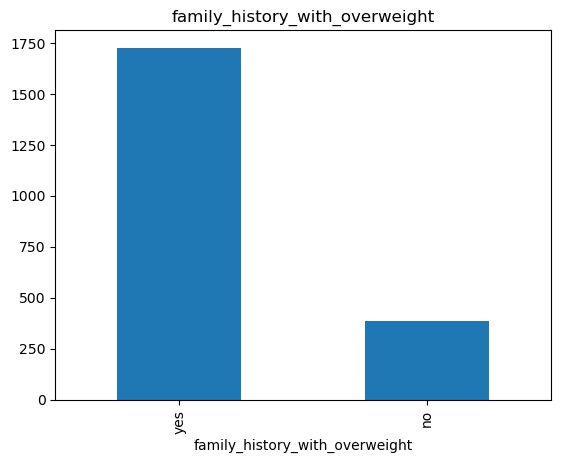

In [13]:
feature = categorical_features[0]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
dfu = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(dfu)
count.plot(kind='bar', title=feature);

            jumlah sampel  persentase
CAEC                                 
Sometimes            1765        83.6
Frequently            242        11.5
Always                 53         2.5
no                     51         2.4


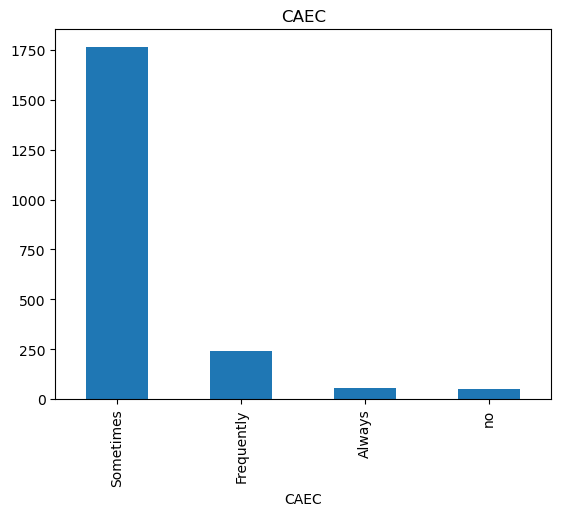

In [14]:
feature = categorical_features[1]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
dfu = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(dfu)
count.plot(kind='bar', title=feature);

## Numerical Features

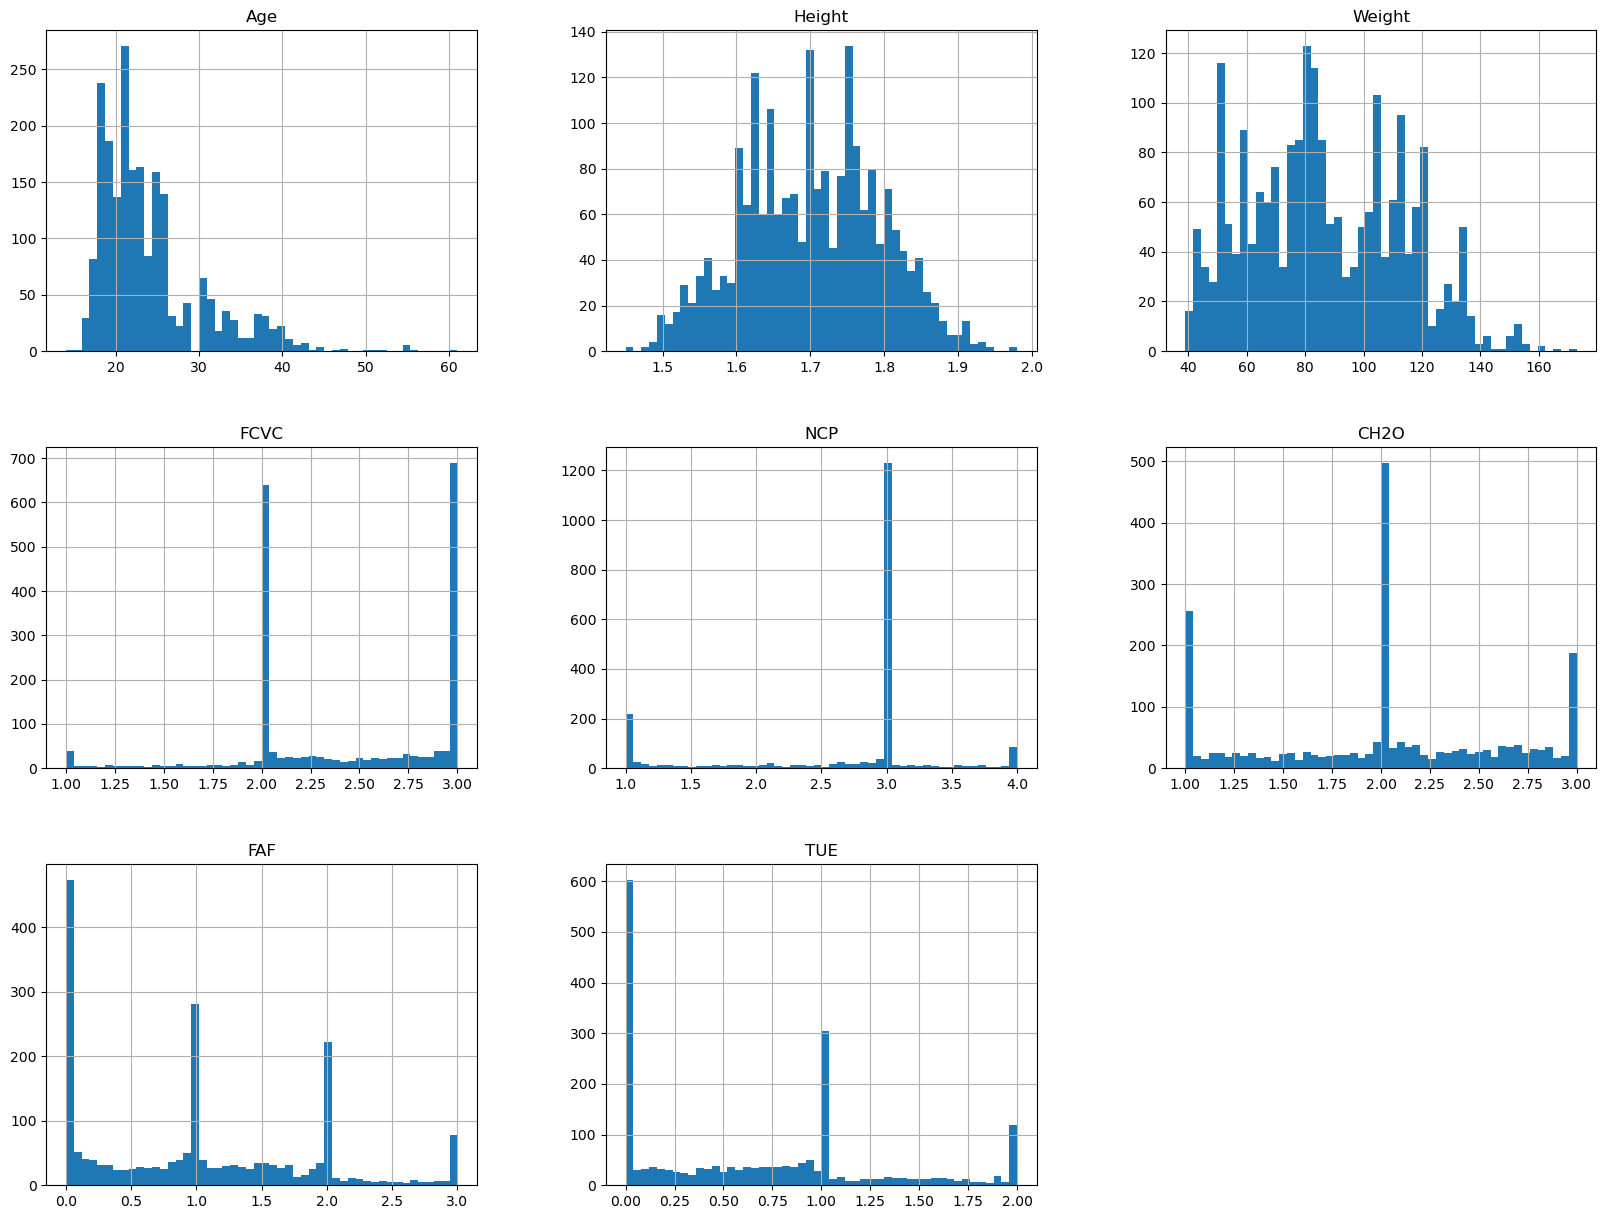

In [15]:
df.hist(bins=50, figsize=(20,15))
plt.show()

# Data Preparation 2

## Reduksi Dimensi dengan PCA

Melakukan reduksi dimensi untuk menyederhanakan dataset yang memiliki fungsi/kriteria yang sama.

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


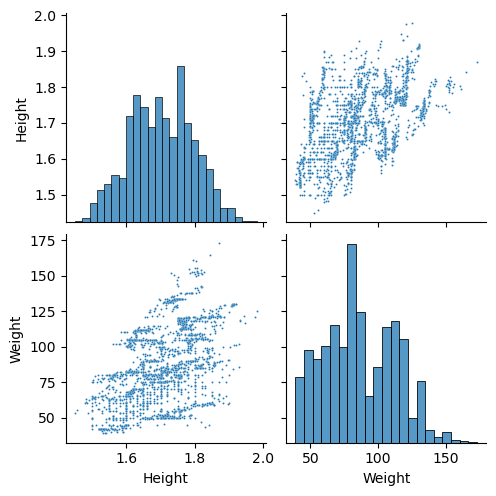

In [16]:
sns.pairplot(dfe[['Height','Weight']], plot_kws={"s": 2});

In [17]:
pca = PCA(n_components=2, random_state=123)
pca.fit(dfe[['Height','Weight']])
princ_comp = pca.transform(dfe[['Height','Weight']])

In [18]:
pca.explained_variance_ratio_.round(4)

array([1., 0.])

Melakukan pembulatan 4 angka

In [19]:
pca = PCA(n_components=1, random_state=123)
pca.fit(dfe[['Height','Weight']])
dfe['dimension'] = pca.transform(dfe.loc[:, ('Height','Weight')]).flatten()
dfe.drop(['Height','Weight'], axis=1, inplace=True)

## Train-Test-Split

In [20]:
X = dfe.drop(["NObeyesdad"],axis =1)
y = dfe["NObeyesdad"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 123)

In [21]:
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 2111
Total # of sample in train dataset: 1899
Total # of sample in test dataset: 212


Membagi dataset menjadi 2 bagian (data train dan test)

## Standarisasi 

In [22]:
numerical_features = ['Age','dimension']
scaler = StandardScaler()
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])
X_train[numerical_features].head()

,Age,dimension
2075,-0.467272,2.318721
566,-0.781990,-1.163486
1765,0.948962,1.469293
1462,-0.152553,0.747500
698,-1.254068,-1.579335


Standarisasi dilakukan untuk mempercepat training dan menambah akurasi dari algoritma dengan menyederhanakan range (rentang) nilai dari dataset.

In [23]:
X_train[numerical_features].describe().round(4)

,Age,dimension
count,1899.0000,1899.0000
mean,-0.0000,-0.0000
std,1.0003,1.0003
min,-1.5688,-1.7984
25%,-0.7820,-0.8099
50%,-0.3099,-0.1398
75%,0.3195,0.8066
max,5.8271,3.2959


Menggunakan `describe().round()` untuk melihat stastistik dari `X_train[numerical_features]` dan melakukan pembulatan 4 angka

# Model Development

In [24]:
# Siapkan dataframe untuk analisis model
models = pd.DataFrame(index=['train_mse', 'test_mse'], 
                      columns=['KNN', 'RandomForest', 'Boosting'])

### KNN

In [25]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
 
knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train, y_train)
 
models.loc['train_mse','knn'] = mean_squared_error(y_pred = knn.predict(X_train), y_true=y_train)

Bagian ini dilakukan training pada algoritma dengan _10 "tetangga"_ dengan data train.

### Random Forest

In [26]:
# Impor library yang dibutuhkan
from sklearn.ensemble import RandomForestRegressor
 
# buat model prediksi
RF = RandomForestRegressor(n_estimators=50, max_depth=16, random_state=55, n_jobs=-1)
RF.fit(X_train, y_train)
 
models.loc['train_mse','RandomForest'] = mean_squared_error(y_pred=RF.predict(X_train), y_true=y_train)        

Melakukan Train model pada algoritma Random Forest

### Boosting Alg

In [27]:
from sklearn.ensemble import AdaBoostRegressor
 
boosting = AdaBoostRegressor(learning_rate=0.05, random_state=55)                             
boosting.fit(X_train, y_train)
models.loc['train_mse','Boosting'] = mean_squared_error(y_pred=boosting.predict(X_train), y_true=y_train)

Melakukan train model pada algoritma Boosting

# Evaluasi Model

In [28]:
# Lakukan scaling terhadap fitur numerik pada X_test sehingga memiliki rata-rata=0 dan varians=1
X_test.loc[:, numerical_features] = scaler.transform(X_test[numerical_features])

Menghitung metrik dengan menggunakan Mean Square Error (MSE)

In [29]:
# Buat variabel mse yang isinya adalah dataframe nilai mse data train dan test pada masing-masing algoritma
mse = pd.DataFrame(columns=['train', 'test'], index=['KNN','RF','Boosting'])
 
# Buat dictionary untuk setiap algoritma yang digunakan
model_dict = {'KNN': knn, 'RF': RF, 'Boosting': boosting}
 
# Hitung Mean Squared Error masing-masing algoritma pada data train dan test
for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))
 
# Panggil mse
mse

,train,test
KNN,1.261564,1.522972
RF,0.202345,1.202889
Boosting,1.856123,2.145006


Semakin kecil error/galatnya, maka semakin baik performas algoritma. Untuk mudah memahami data hasil perhitungan MSE di atas, lihat grafik berikut

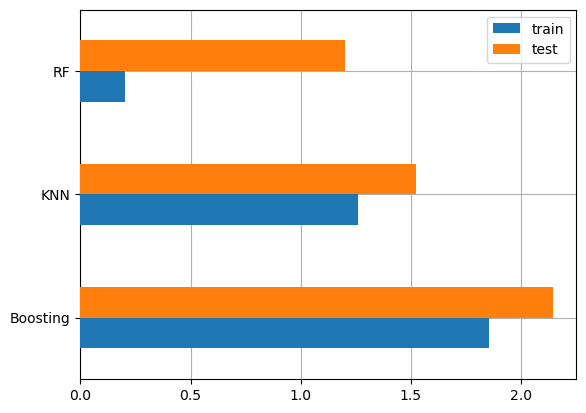

In [30]:
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

Dari gambar di atas, terlihat bahwa, model Random Forest (RF) memberikan nilai eror yang paling kecil. Sedangkan model dengan algoritma Boosting memiliki eror yang paling besar (berdasarkan grafik, angkanya di atas 2.0). Sehingga model RF yang akan kita pilih sebagai model terbaik untuk melakukan prediksi harga diamonds.

In [31]:
prediksi = X_test.iloc[:1].copy()
pred_dict = {'y_true':y_test[:1]}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)
 
pd.DataFrame(pred_dict)

,y_true,prediksi_KNN,prediksi_RF,prediksi_Boosting
600,0,0.0,0.0,0.1


Terlihat bahwa prediksi dengan Random Forest (RF) dan KNN memberikan hasil yang sama dan prediksi_Boosting cukup mendekati.